In [1]:
import pandas as pd

## Pandas

### DataFrame
We can think of Pandas as dictionary of series. Let's see an example of how we construct a DataFrame using equal-length lists or arrays

In [2]:
dat = {'district': ['Makati', 'BGC', 'Ayala', 'Cebu', 'Davao'], 
      'year': [2001,2002,2003,2006,2007], 
      'population': [1.2, 2.3, 4.2, .8, 1.6]}

df = pd.DataFrame(dat)
df

,district,population,year
0,Makati,1.2,2001
1,BGC,2.3,2002
2,Ayala,4.2,2003
3,Cebu,0.8,2006
4,Davao,1.6,2007


In [3]:
# we want to know the column names
df.columns

Index(['district', 'population', 'year'], dtype='object')

There are two ways of accessing an entire column:
* df[ 'pop' ]
* df.pop

In [4]:
df.population
# df['population']

0    1.2
1    2.3
2    4.2
3    0.8
4    1.6
Name: population, dtype: float64

In [5]:
#create another column:
car = pd.Series([1.3, 2.3, 4.5]) #from Series
df['cars'] = car
df

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3
2,Ayala,4.2,2003,4.5
3,Cebu,0.8,2006,NaN
4,Davao,1.6,2007,NaN


### Reindexing


In [6]:
obj = pd.Series([4.5, 3.2, -5.6, 2.5], index = ['d', 'a', 'c', 'b'])
obj

d    4.5
a    3.2
c   -5.6
b    2.5
dtype: float64

In [7]:
obj.reindex(['a','b', 'c', 'd', 'e'])

a    3.2
b    2.5
c   -5.6
d    4.5
e    NaN
dtype: float64

notice that when we reindex, the values are arranged

In [8]:
df

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3
2,Ayala,4.2,2003,4.5
3,Cebu,0.8,2006,NaN
4,Davao,1.6,2007,NaN


### How to index / subset DataFrame?
* iloc
* loc
* ix
* masking

### df.iloc 
Implicit location

df.iloc[row,column]

In [9]:
df.iloc[2,3] #index 2 row, index 3 column

4.5

In [10]:
df.iloc[:2,:] #First two records

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3


In [11]:
df.iloc[:,:2] #First 2 columns

,district,population
0,Makati,1.2
1,BGC,2.3
2,Ayala,4.2
3,Cebu,0.8
4,Davao,1.6


In [12]:
df.iloc[-1:,] # last record 

,district,population,year,cars
4,Davao,1.6,2007,NaN


In [13]:
df.iloc[:,-1:] #last column

,cars
0,1.3
1,2.3
2,4.5
3,NaN
4,NaN


### df.loc 
Explicit location

df.loc[row_index,column_index]

In [14]:
df

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3
2,Ayala,4.2,2003,4.5
3,Cebu,0.8,2006,NaN
4,Davao,1.6,2007,NaN


In [15]:
df.loc[1,'population']

2.2999999999999998

In [16]:
df.loc[1,2] #This will generate an error!

TypeError: cannot do label indexing on <class 'pandas.indexes.base.Index'> with these indexers [2] of <class 'int'>

In [17]:
df.index = ['a','b','c','d','e']
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


### df.ix 
Explicit-Implicit location

df.ix[row,column]

In [18]:
df.iloc['c','cars'] #This will generate an error since the indexers are explicit

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [19]:
df.ix['c','cars']

4.5

In [20]:
df.ix[2,'cars']

4.5

In [21]:
df.ix['d',2]

2006

### Masking
slicing data

In [22]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [23]:
df['district'] #call one column

a    Makati
b       BGC
c     Ayala
d      Cebu
e     Davao
Name: district, dtype: object

In [24]:
# call multiple columns
# subset with a list[]
df[['population', 'cars']]



,population,cars
a,1.2,1.3
b,2.3,2.3
c,4.2,4.5
d,0.8,NaN
e,1.6,NaN


In [25]:
#Masking based on a condition
df[df['population'] > 2]

,district,population,year,cars
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5


In [26]:
#Masking based on multiple conditions
#year greater or equal to 2003 and population less than 2 M
df[(df['year'] >= 2003) & (df['population'] < 2)]

,district,population,year,cars
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


take note of the boolean operators '&' for intersection '|' for union

### Sorting
*  df.sort_values(by='col_name', ascending = True)

In [27]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [28]:
df.sort_values(by = 'district')


,district,population,year,cars
c,Ayala,4.2,2003,4.5
b,BGC,2.3,2002,2.3
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN
a,Makati,1.2,2001,1.3


In [29]:
df.sort_values(by = 'population', ascending = False)

,district,population,year,cars
c,Ayala,4.2,2003,4.5
b,BGC,2.3,2002,2.3
e,Davao,1.6,2007,NaN
a,Makati,1.2,2001,1.3
d,Cebu,0.8,2006,NaN


### Summarizing and Computing Descriptive stats

In [30]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [31]:
df.describe()

,population,year,cars
count,5.000000,5.000000,3.000000
mean,2.020000,2003.800000,2.700000
std,1.338656,2.588436,1.637071
min,0.800000,2001.000000,1.300000
25%,1.200000,2002.000000,1.800000
50%,1.600000,2003.000000,2.300000
75%,2.300000,2006.000000,3.400000
max,4.200000,2007.000000,4.500000


In [32]:
df.sum(axis = 1)

a    2003.5
b    2006.6
c    2011.7
d    2006.8
e    2008.6
dtype: float64

In [33]:
#let's try to calculate mean of cars column
print('mean of num of cars is:',df.cars.mean())

mean of num of cars is: 2.6999999999999997


In [34]:
#Let's try to calculate standard deviation of population
print('std dev of population is:',df.population.std())

std dev of population is: 1.3386560424545209


### Let's try correlation and covariance

Get data first from Yahoo Finance Stock prices and volumes

In [35]:
#Get data programmatically using dictionary comprehensions

import pandas.io.data as web

all_data = {} #Initialize dictionary

#programmatically collect data
for ticker in ['APL', 'IBM', 'MSFT', 'GOOG']: 
    all_data[ticker] = web.get_data_google(ticker, '1/1/2000', '1/1/2010')
    

price = pd.DataFrame({tic:data['Close'] 
                     for tic, data in iter(all_data.items())})
    
volume = pd.DataFrame({tic:data['Volume'] 
                     for tic, data in iter(all_data.items())})



C:\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [36]:
all_data['GOOG']

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN
2004-08-20,50.69,54.49,50.20,54.10,NaN
2004-08-23,55.32,56.68,54.47,54.65,NaN
2004-08-24,55.56,55.74,51.73,52.38,NaN
2004-08-25,52.43,53.95,51.89,52.95,NaN
2004-08-26,52.42,53.92,52.28,53.90,NaN
2004-08-27,54.00,54.26,52.79,53.02,NaN
2004-08-30,52.69,52.69,50.95,50.95,NaN
2004-08-31,51.11,51.80,51.03,51.13,NaN


In [37]:
#Calculate percent change on prices
returns = price.pct_change()

In [38]:
returns.head()

,APL,GOOG,IBM,MSFT
Date,,,,
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,-0.030287,-0.034796
2000-01-05,NaN,NaN,0.035160,0.010655
2000-01-06,NaN,NaN,-0.011897,-0.033562
2000-01-07,NaN,NaN,-0.011429,0.013091


### Pairwise correlation of values of non-null values


In [39]:
returns.corr()

,APL,GOOG,IBM,MSFT
APL,1.000000,0.269985,0.127867,0.137729
GOOG,0.269985,1.000000,0.389626,0.438720
IBM,0.127867,0.389626,1.000000,0.504065
MSFT,0.137729,0.438720,0.504065,1.000000


### Covariance matrix


In [40]:
returns.cov()

,APL,GOOG,IBM,MSFT
APL,0.000938,0.000218,0.000075,0.000096
GOOG,0.000218,0.000580,0.000142,0.000204
IBM,0.000075,0.000142,0.000371,0.000221
MSFT,0.000096,0.000204,0.000221,0.000518


### Handling Missing Values
* dropna
* fillna
* isnull
* notnull

In [41]:
import numpy as np

s = pd.Series(['a', np.nan, 1, 2.3])

In [42]:
#detect which part of the series is null
s.isnull()

0    False
1     True
2    False
3    False
dtype: bool

In [43]:
s.dropna()


0      a
2      1
3    2.3
dtype: object

In [44]:
#back to our df
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


What if we want to impute for Nan Values?

In [45]:
df2 = df.fillna(df.cars.mean())
df2

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,2.7
e,Davao,1.6,2007,2.7


### Loading Data
* read_csv
* read_txt
* read_table

### Outputting Data

### Dealing with JSON (JavaScript Object Notation) data

JSON (short for JavaScript Object Notation) has become one of the standard formats
for sending data by HTTP request between web browsers and other applications. It is
a much more flexible data format than a tabular text form like CSV

* **json.loads** - json to python object
* **json.dumps** - python object to json

alternatively using native pandas:

* **from_json**
* **to_json**

# Data Wrangling: Clean, Transform, Merge, Reshape
http://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

## Merging Datasets
* pandas.merge - merge using SQL Like commands
* pandas.concat - stack Dfs along a certain axis

In [46]:
# a displayer function borrowed from JakeDave
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [47]:
df1 = pd.DataFrame({'Policy_Holder': ['001', '023', '054', '120', '032'],
                    'Policy_Typ': ['Home & Contents', 'Property', 'Motor', 'Motor', 'Workers_comp']})
df2 = pd.DataFrame({'Pol_H': ['001', '023', '054', '120', '032'],
                    'Inc_date': [2004, 2008, 2012, 2014, 2012]})
display('df1', 'df2')

,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
,Inc_date,Pol_H
0,2004,001
1,2008,023
2,2012,054
3,2014,120


### Merge

Say we want to get the inception date in df2 table by joining these datasets

In [48]:
df_join = pd.merge(df1, df2, left_on = 'Policy_Holder', right_on = 'Pol_H', how = 'left')

#if you don't specify, it will automatically find common key and join on that key
#in our example, we specify the left and right keys

display('df1', 'df2', 'df_join')



,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
,Inc_date,Pol_H
0,2004,001
1,2008,023
2,2012,054
3,2014,120


In [49]:
#Insert other merge functionalities eg. Suffix, etc

### Excercise

1. Download Data from:

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

2. Task: Rank US States and territories by their 2010 population

### Concatenating

Most of the time we need to append datasets. we can specify the axis of concatenation:

* axis = 1 means along columns
* axis = 0 means along rows

Let's see how this is done in numpy arrays first

In [50]:
import numpy as np
my_array = np.arange(20).reshape(4,5)
my_array


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [51]:
np.concatenate([my_array, my_array], axis = 0) #try axis = 1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### pd.concat( [ list_of_items ] )

fells like rbind or cbind in R

In [52]:
pd.concat([df1,df1], axis = 0,) #try ignore_index = True

,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp


### Group By: The Split - Apply - Combine principle

the magic of groupby!!

aggregate(), filter(), transform(), apply() check my implementation in dup pay

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

* **Split** - break up and group a dataframe based on a specified key
* **apply** - evaluate some function per split
* **combine** - Merge back the splitted data with the applied function

In [59]:
#Lets see some example:
df = pd.DataFrame({'div': ['AO', 'GO', 'EM', 'AO', 'GO', 'EM'],
                   'data': range(1,7)}, columns=['div', 'data'])
df

,div,data
0,AO,1
1,GO,2
2,EM,3
3,AO,4
4,GO,5
5,EM,6


In [60]:
#groupby object
df.groupby('div')

#doesn't calculate yet until aggregation

In [64]:
AO = df[df['div']=='AO'].copy()
GO = df[df['div']=='GO'].copy()
EM = df[df['div']=='EM'].copy()
display('AO', 'GO', 'EM')

,div,data
0,AO,1
3,AO,4
,div,data
1,GO,2
4,GO,5
,div,data
2,EM,3
5,EM,6


data is split first accordingly

In [63]:
df.groupby('div').sum()

,data
div,
AO,5
EM,9
GO,7


after splitting, the function is applied and then the results are combined

Some Aggregate functions:

    count(), first(), last(), mean(), median(), min(), max(), std(), var(), prod(), sum()

### Now we apply groupby into real world data

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

In [65]:
credit = pd.read_csv('C:/Users/ASUS/Documents/Python_Scripts/credit/UCI_Credit_Card.csv')

In [66]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [67]:
credit.groupby('SEX')['EDUCATION']

In [90]:
credit.groupby(['EDUCATION', 'MARRIAGE'])['default.payment.next.month'].sum().unstack()

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,0.0,0.0,NaN
1,0.0,769.0,1254.0,13.0
2,1.0,1666.0,1619.0,44.0
3,4.0,754.0,452.0,27.0
4,NaN,3.0,4.0,0.0
5,NaN,9.0,9.0,0.0
6,NaN,5.0,3.0,0.0


**df.groupby( 'column_to_group_by' )[ 'column_to_perform_function' ].function()**

In [83]:
credit.groupby(['SEX'])['AGE','EDUCATION'].describe()
#Try Unstacking - unstack multi-indexed dataframe

AGE     EDUCATION
SEX                                  
1   count  11888.000000  11888.000000
    mean      36.519431      1.839250
    std        9.404555      0.793884
    min       21.000000      0.000000
    25%       29.000000      1.000000
    50%       35.000000      2.000000
    75%       43.000000      2.000000
    max       79.000000      6.000000
2   count  18112.000000  18112.000000
    mean      34.806868      1.862246
    std        9.029441      0.787908
    min       21.000000      0.000000
    25%       28.000000      1.000000
    50%       33.000000      2.000000
    75%       41.000000      2.000000
    max       75.000000      6.000000

In [ ]:
# aggregate(), filter(), apply() methods

### Pivot Tables
let's some try pivoting on a data set we will be getting from data.gov.ph

In [68]:
RIT = pd.read_csv('http://storage.googleapis.com/amt-dgph.appspot.com/uploads/'+ \
                  'kn1XXP648jzKGXfh0nAS/pnp_motorcycle_riding_in_tandem_criminals_2011-2013.csv', low_memory = False)

In [69]:
RIT.head()

,year,month,police_regional_office,shooting_incidents_killed,shooting_incidents_wounded,shooting_incidents_unharmed,shooting_incidents_total,robbery_killed,robbery_wounded,robbery_unharmed,...,victims_total,status_of_suspects_at-large,status_of_suspects_arrested,status_of_suspects_killed,status_of_suspects_total,status_of_case_under_investigation,status_of_case_referred_to_pros,status_of_case_filed_in_court,status_of_case_no_case_filed,total_number_of_incidents
0,2011,January,1,12,5,1,14,0,0,1,...,20,28,1,0,29,8,9,0,0,17
1,2011,January,2,0,0,0,0,0,0,0,...,-,0,0,0,-,0,0,0,0,-
2,2011,January,3,9,5,0,12,0,0,15,...,29,54,0,0,54,21,6,0,0,27
3,2011,January,4A,7,6,2,15,0,0,17,...,33,68,0,0,68,21,9,3,0,33
4,2011,January,4B,0,0,0,0,0,0,0,...,-,0,0,0,-,0,0,0,0,-


In [70]:
#Create a table of shooting_incidents per year by region
pd.pivot_table(RIT, index = 'police_regional_office', columns = 'year', values = 'shooting_incidents_killed')

DataError: No numeric types to aggregate

Ooops! There's an error!!!

Let's figure out what is the cause of error 

In [71]:
RIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 29 columns):
year                                  611 non-null int64
month                                 611 non-null object
police_regional_office                611 non-null object
shooting_incidents_killed             611 non-null object
shooting_incidents_wounded            611 non-null object
shooting_incidents_unharmed           611 non-null object
shooting_incidents_total              611 non-null object
robbery_killed                        611 non-null object
robbery_wounded                       611 non-null object
robbery_unharmed                      611 non-null object
robbery_total                         611 non-null object
carnapping_killed                     611 non-null object
carnapping_wounded                    611 non-null object
carnapping_unharmed                   611 non-null object
carnapping_total                      611 non-null object
others_killed             

In [58]:
#sub2 = RIT.iloc[:,3:].convert_objects(convert_numeric = True)
RIT['shooting_incidents_killed'] = pd.to_numeric(RIT['shooting_incidents_killed'], errors = 'coerce')

In [73]:
part1 = RIT.iloc[:,0:3]

In [74]:
#It seems that the numeric values are not in the correct data types, let's try to convert them

pd.to_numeric(RIT['shooting_incidents_killed'])

ValueError: Unable to parse string

**ANOTHER ERROR! Unable to Parse String!**

research how to fix this

In [63]:

#Let's transform these variables into numeric

part2 = RIT.iloc[:,3:].apply(lambda x: pd.to_numeric(x,errors = 'coerce'), axis = 0)
#apply functions apply a function across columns
#lambda Function: anonymous function
#to_numeric tries to convert an object into numeric
#axis = 0 means apply the function on each rows

In [65]:
part2.head()

,shooting_incidents_killed,shooting_incidents_wounded,shooting_incidents_unharmed,shooting_incidents_total,robbery_killed,robbery_wounded,robbery_unharmed,robbery_total,carnapping_killed,carnapping_wounded,...,victims_total,status_of_suspects_at-large,status_of_suspects_arrested,status_of_suspects_killed,status_of_suspects_total,status_of_case_under_investigation,status_of_case_referred_to_pros,status_of_case_filed_in_court,status_of_case_no_case_filed,total_number_of_incidents
0,12.0,5.0,1.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,...,20.0,28.0,1.0,0.0,29.0,8.0,9.0,0.0,0.0,17.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
2,9.0,5.0,0.0,12.0,0.0,0.0,15.0,15.0,0.0,0.0,...,29.0,54.0,0.0,0.0,54.0,21.0,6.0,0.0,0.0,27.0
3,7.0,6.0,2.0,15.0,0.0,0.0,17.0,17.0,0.0,1.0,...,33.0,68.0,0.0,0.0,68.0,21.0,9.0,3.0,0.0,33.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN


**Let's recombine these parts. What shall we use?**

In [80]:
RIT = pd.concat([part1, part2], axis = 1)

In [81]:
#Let's try to pivot again
pd.pivot_table(RIT, index = 'police_regional_office', columns = 'year', values = 'shooting_incidents_killed')

year,2011,2012,2013
police_regional_office,,,
1,5.250000,6.916667,9.500000
10,0.083333,5.916667,5.000000
11,10.250000,10.250000,10.666667
12,2.833333,5.583333,7.000000
13,0.500000,3.636364,3.083333
2,1.916667,2.454545,1.666667
3,16.750000,8.083333,11.083333
4A,9.500000,14.416667,9.250000
4B,0.166667,0.916667,1.500000


In [82]:
RIT.isnull().values.any()

True

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

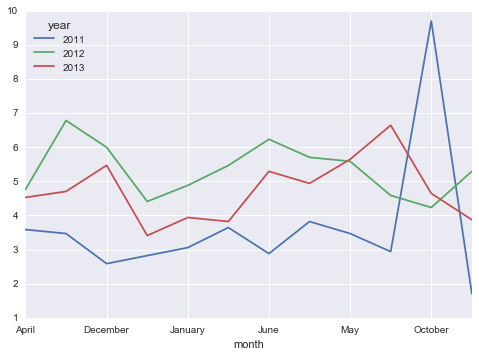

In [88]:
pd.pivot_table(RIT, index = 'month', columns = 'year', values = 'shooting_incidents_killed').plot()

In [11]:
RIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 29 columns):
year                                  611 non-null int64
month                                 611 non-null object
police_regional_office                611 non-null object
shooting_incidents_killed             611 non-null object
shooting_incidents_wounded            611 non-null object
shooting_incidents_unharmed           611 non-null object
shooting_incidents_total              611 non-null object
robbery_killed                        611 non-null object
robbery_wounded                       611 non-null object
robbery_unharmed                      611 non-null object
robbery_total                         611 non-null object
carnapping_killed                     611 non-null object
carnapping_wounded                    611 non-null object
carnapping_unharmed                   611 non-null object
carnapping_total                      611 non-null object
others_killed             

In [28]:
pd.read_csv?

Excercises:

* https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb
* https://github.com/guipsamora/pandas_exercises
* http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb
        

### Some Matplotlib

Some Scikit - PCA and KNN? CRedit data Set
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset